In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fonction_stage as st
from numpy.fft import fft 
from numpy.fft import ifft 
import scipy as sp
from scipy.signal import butter, lfilter, filtfilt
from scipy.signal import freqz

In [2]:
######### A MODIFIER ###########

data=np.loadtxt('digue4b.txt')
name='digue4b'
tsimu=0.6
Nrec=24
mail_fmax=40
################################

ech=np.size(data)/Nrec
ech=int(ech)
dt=tsimu/ech
fmax=1/dt
fNy=fmax/2
df=1/tsimu

data=np.reshape(data, np.size(data))
data=np.reshape(data, (ech,Nrec))

np.shape(data)

print("ech, nombre de points du signal =",ech)
print("dt, pas de temps", dt)
print("fmax, fech =",fmax)
print("fNy=", fNy)
print("df, pas en fréquence=", df)

ech, nombre de points du signal = 6001
dt, pas de temps 9.998333611064822e-05
fmax, fech = 10001.666666666668
fNy= 5000.833333333334
df, pas en fréquence= 1.6666666666666667


9.999999999999999e-05


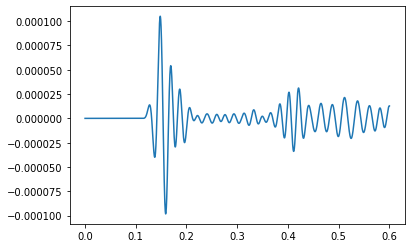

In [3]:
tmin=0+dt
tmax=0.6+dt
temps=np.linspace(tmin,tmax,ech)

plt.figure
plt.plot(temps, data[:,0])
print(temps[2]-temps[1])

(6001, 24)


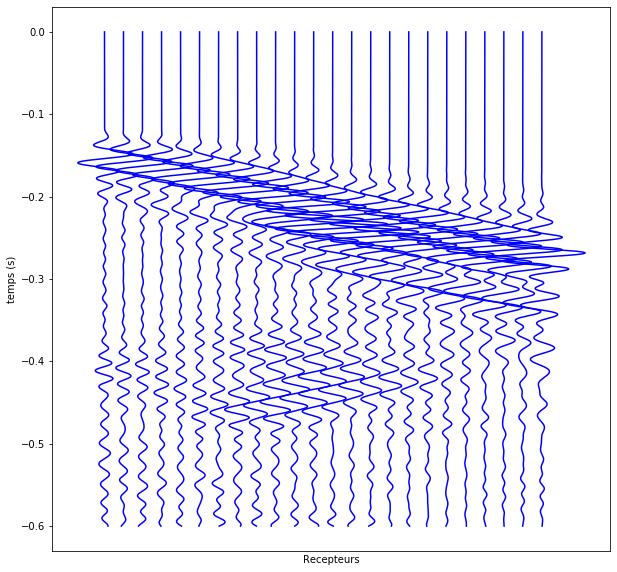

In [4]:
aux=np.max(np.abs(data))
vecteur=np.linspace(0,(aux/3)*Nrec,Nrec)

mat=np.ones((ech,1))*vecteur
print(np.shape(mat))
data_p=data+mat

plt.figure(figsize=(10,10))
plt.plot(data_p,-temps, 'b')
plt.xlabel("Recepteurs")
plt.ylabel("temps (s)")
plt.xticks([]) ;

figwave="wave.png"
namefigwave=name+figwave
plt.savefig(namefigwave)

In [5]:
recp=np.linspace(1,Nrec,Nrec)
freq=np.arange(0+df,fmax+(df/2),df)

print(np.shape(freq))

(6001,)


In [6]:
ntemps, nrecp = (Nrec, ech)
nrecp, ntemps = np.meshgrid(recp, temps)

nfreq, nrecp = (Nrec, ech)
nrecp, nfreq = np.meshgrid(recp, freq)

np.shape(nfreq)

(6001, 24)

Text(0, 0.5, 'y')

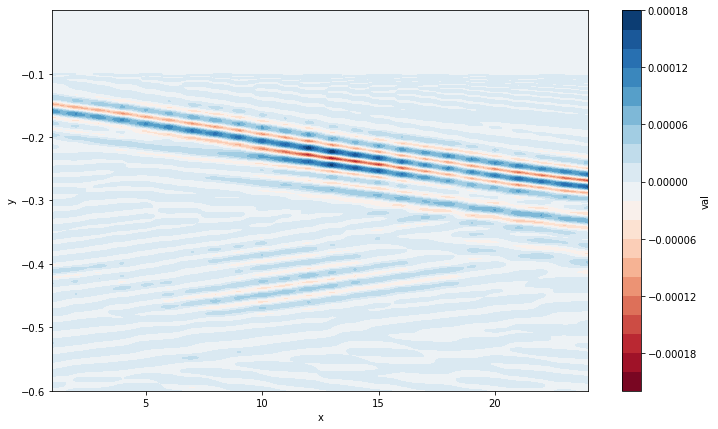

In [7]:
plt.figure(figsize= (12,7))
cf = plt.contourf(nrecp,-ntemps,-data,20, cmap='RdBu')
plt.colorbar(label = 'val')
plt.contour(cf,colors = 'k',linewidths = 0,alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')

(-100, 0)

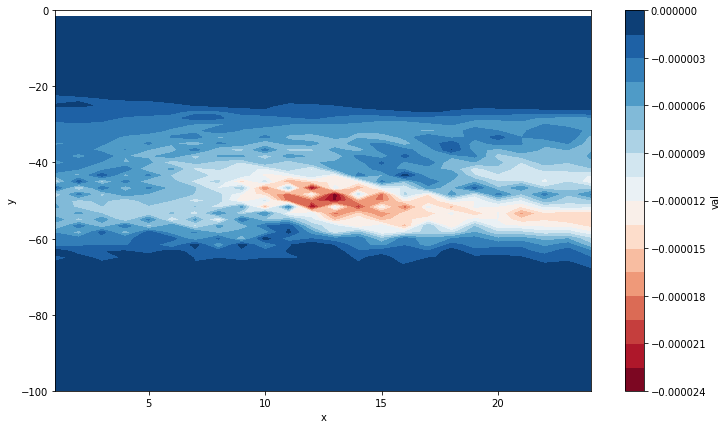

In [8]:
### spectre en fréquence du tir ###

size=(ech, Nrec)
specfx=np.zeros(size)

for i in range (Nrec):
    signal=data[:,i]
    t= temps
    tfd = fft(signal)
    N=len(signal)
    spectre = np.absolute(tfd)*2/N
    T=max(t)
    specfx[:,i]=spectre
    
plt.figure(figsize= (12,7))
cf = plt.contourf(nrecp,-nfreq,-specfx,20, cmap='RdBu')
plt.colorbar(label = 'val')
plt.contour(cf,colors = 'k',linewidths = 0,alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-100,0)
    

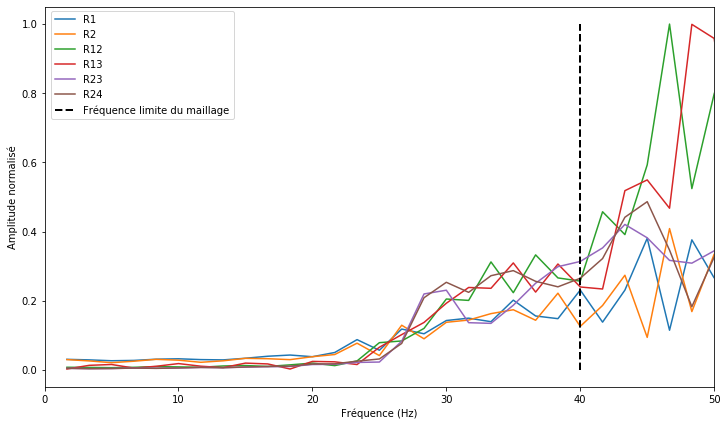

In [9]:
#figure comparaison 
norma=np.max(specfx)

plt.figure(figsize= (12,7))
plt.plot(freq,specfx[:,0]/norma, label="R1")
plt.plot(freq,specfx[:,1]/norma, label="R2")
plt.plot(freq,specfx[:,11]/norma, label="R12")
plt.plot(freq,specfx[:,12]/norma, label="R13")
plt.plot(freq,specfx[:,22]/norma, label="R23")
plt.plot(freq,specfx[:,23]/norma, label="R24")
plt.plot([mail_fmax, mail_fmax],[0,1],  'k--', lw=2, label="Fréquence limite du maillage")

plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude normalisé')
plt.xlim(0,50)

plt.legend(bbox_to_anchor=(0.01, 0.99), loc=2, borderaxespad=0.)

figtransfil="_TF.png"
namefigtransfil=name+figtransfil
plt.savefig(namefigtransfil)

In [10]:
## fitrage des données ##

def butter_lowpass(fcut, fs, order=5):
    nyq = 0.5 * fs
    cut= fcut / nyq
    b, a = butter(order, cut, btype='low')
    return b, a

def butter_lowpass_filter(data, fcut, fs, order=5):
    b, a = butter_lowpass(fcut,fs, order=order)
    y = filtfilt(b, a, data)
    return y


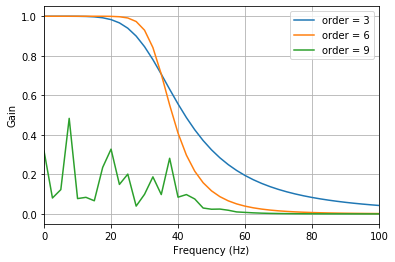

In [11]:
# cutoff frequencies (in Hz).
fcut= 35
fs=1/dt


# Plot the frequency response for a few different orders.
plt.figure(1)

for order in [3, 6, 9]:
    b, a = butter_lowpass(fcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.xlabel('Frequency (Hz)')
plt.xlim(0,100)
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')


Text(0, 0.5, 'y')

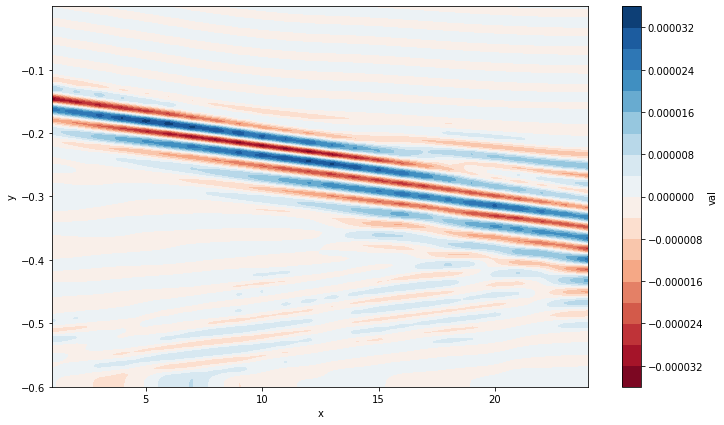

In [12]:
#choose order 
order=6
nsamples = ech
data_f=np.zeros(size)

# Filter a signal.
for i in range (Nrec):
    x = data[:,i]
    y = butter_lowpass_filter(x, fcut, fs, order=order)
    data_f[:,i]=y
    
plt.figure(figsize= (12,7))
cf = plt.contourf(nrecp,-ntemps,-data_f,20, cmap='RdBu')
plt.colorbar(label = 'val')
plt.contour(cf,colors = 'k',linewidths = 0,alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')

In [13]:
savetxtf="_filtre.txt"
namefigfil=name+savetxtf
np.savetxt(namefigfil, data_f)

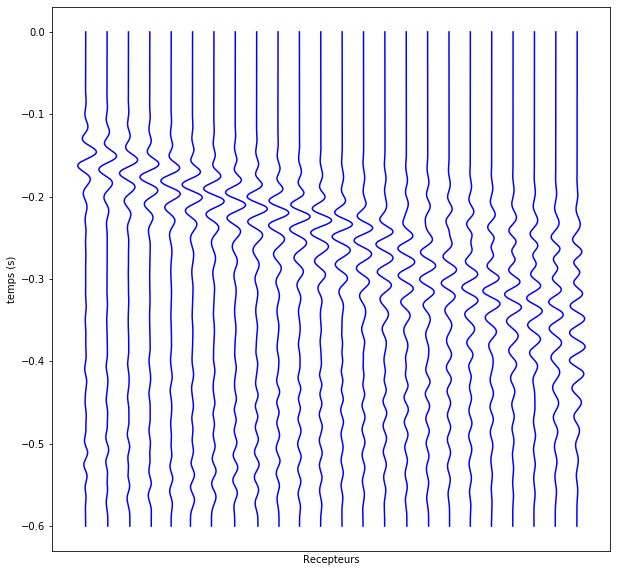

In [14]:
data_p=data_f+mat

plt.figure(figsize=(10,10))
plt.plot(data_p,-temps, 'b') ;
plt.xlabel("Recepteurs")
plt.ylabel("temps (s)")
plt.xticks([]) ;

figwavefil="wave_filtre.png"
namefigwavefil=name+figwavefil
plt.savefig(namefigwavefil)

(-50, 0)

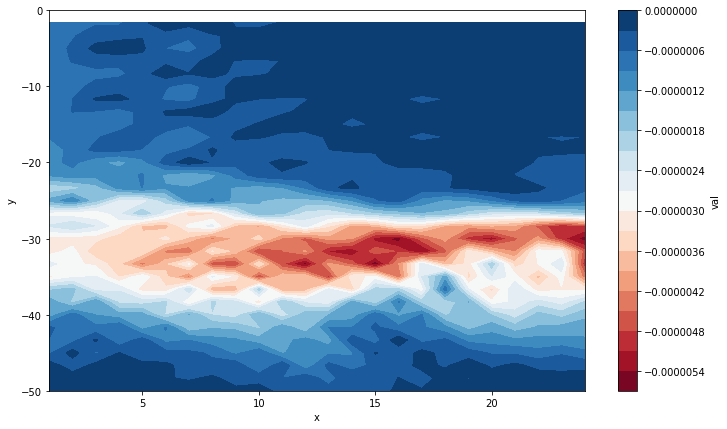

In [15]:
specfx_f=np.zeros(size)
specfx_f_i=np.zeros(size, dtype=complex)

for i in range (Nrec):
    signal=data_f[:,i]
    t= temps
    tfd = fft(signal)
    N=len(signal)
    spectre = np.absolute(tfd)*2/N
    T=max(t)
    
    nrecp, nfreq = np.meshgrid(recp, freq)
    specfx_f_i[:,i]=tfd
    specfx_f[:,i]=spectre

plt.figure(figsize= (12,7))
cf = plt.contourf(nrecp,-nfreq,-specfx_f,20, cmap='RdBu')
plt.colorbar(label = 'val')
plt.contour(cf,colors = 'k',linewidths = 0,alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-50,0)

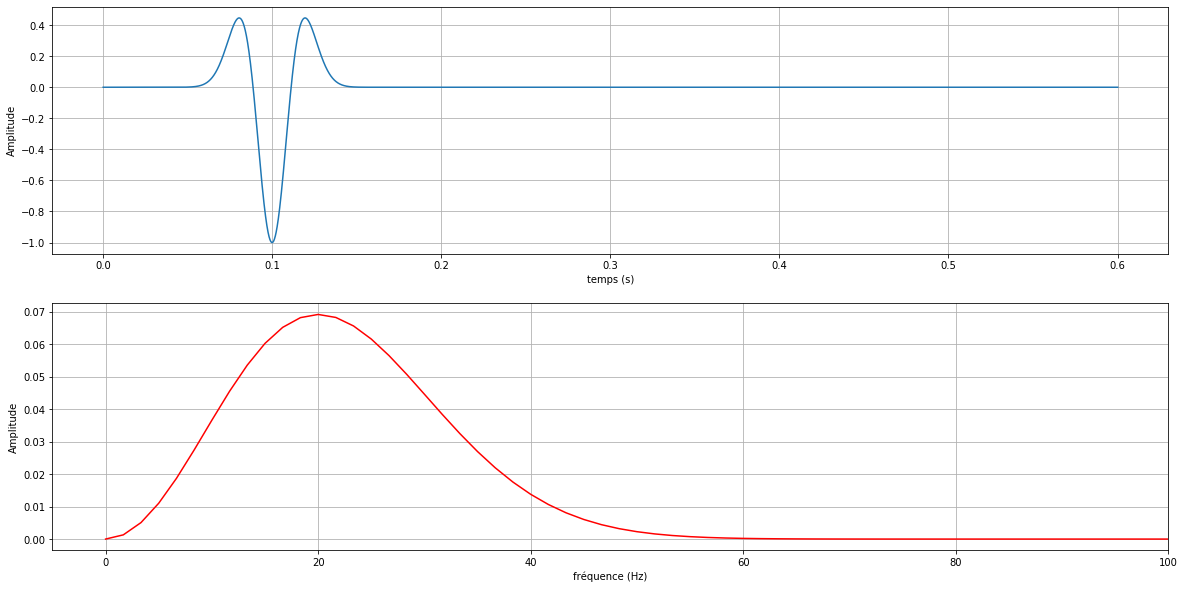

In [16]:
tp=1/20
ts=0.1 
a=1 
dmin=0.001 
dmax=2
dt=0.001

t = temps
ricker = 2.0*a*((np.pi**2)*((1/(tp**2))*((t-ts)**2))-0.5)* np.exp(-(np.pi**2)*(1/(tp**2))*((t-ts)**2))
f=1/t
f1=1/tp

st.plot_fft(ricker,t)

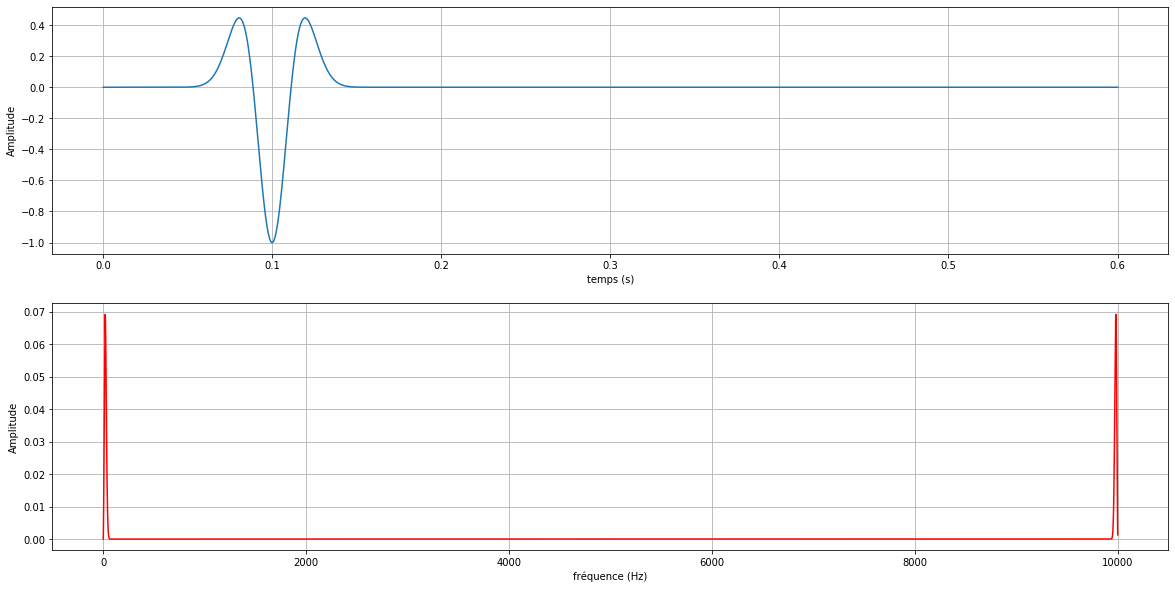

In [17]:
signal=ricker

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(t,signal)
plt.grid()
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
    
tfd = fft(signal)
N=len(signal)
spectre = np.absolute(tfd)*2/N
T=max(t)
    
plt.subplot(212)
plt.plot(freq,spectre,'r')
plt.xlabel('fréquence (Hz)')
plt.ylabel('Amplitude')
plt.grid()

f_ricker=spectre
f_ricker_i=tfd
#f_ricker[600:]=0

(-50, 0)

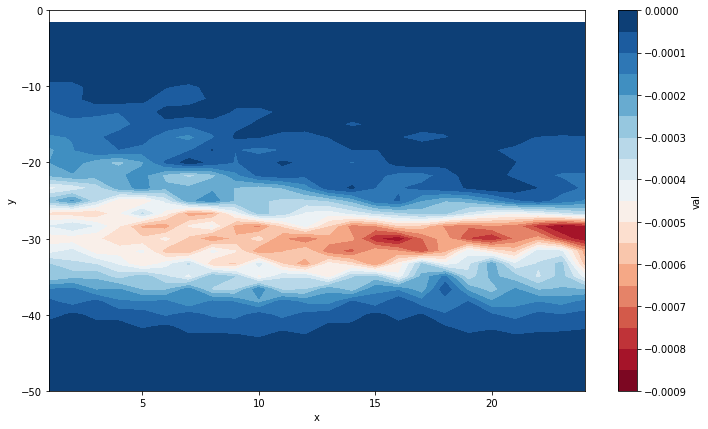

In [18]:
specfx_ricker_i=np.zeros(size, dtype='complex')
specfx_ricker=np.zeros(size)

for i in range (Nrec):
    fr=specfx_f_i[:,i]*f_ricker_i
    specfx_ricker_i[:,i]=fr
    specfx_ricker[:,i]=np.absolute(fr)*2/N
    
plt.figure(figsize= (12,7))
cf = plt.contourf(nrecp,-nfreq,-specfx_ricker,20, cmap='RdBu')
plt.colorbar(label = 'val')
plt.contour(cf,colors = 'k',linewidths = 0,alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-50,0)

C:\Users\Pauli\anaconda3\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


Text(0, 0.5, 'y')

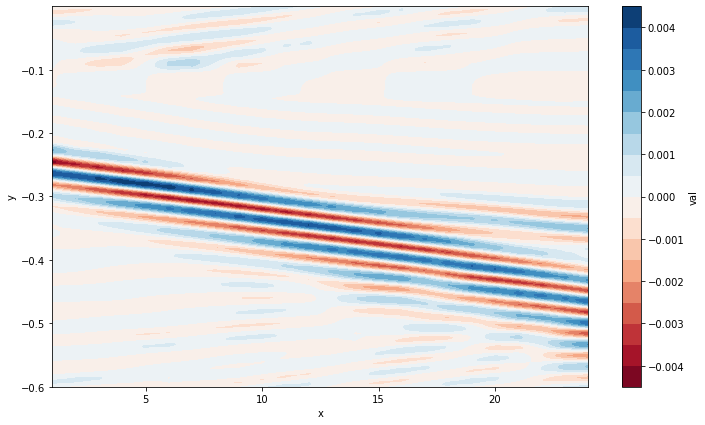

In [19]:
data_Ricker=np.zeros(size)

for i in range (Nrec):
    A=specfx_ricker_i[:,i]
    signal = ifft(A)
    
    #spectre = np.absolute(signal)*2/N
    
    data_Ricker[:,i]=signal
    

plt.figure(figsize= (12,7))
cf = plt.contourf(nrecp,-ntemps,data_Ricker,20, cmap='RdBu')
plt.colorbar(label = 'val')
plt.contour(cf,colors = 'k',linewidths = 0,alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')


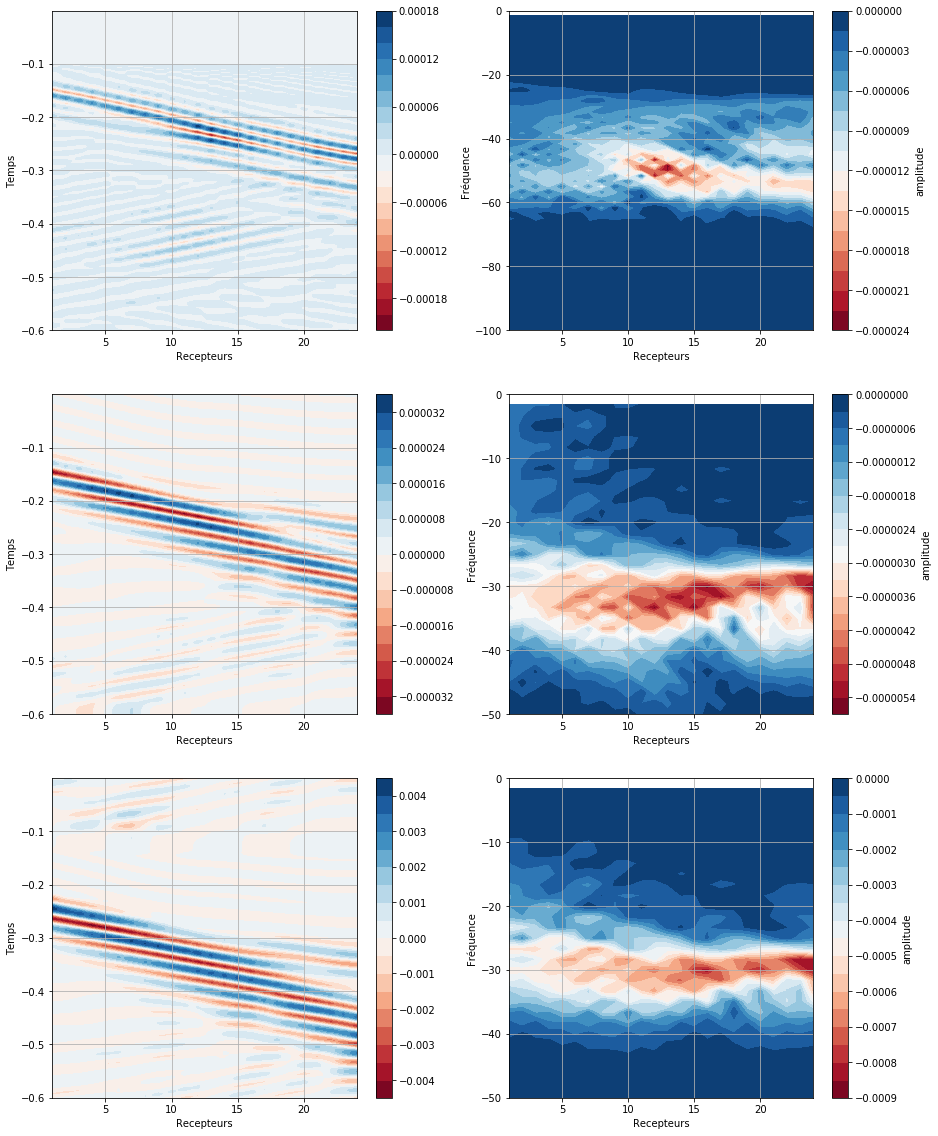

In [20]:
plt.figure(figsize=(15,20))

plt.subplot(3,2,1)
cf = plt.contourf(nrecp,-ntemps,-data,20, cmap='RdBu')
plt.colorbar()
plt.contour(cf,colors = 'k',linewidths = 0,alpha=0.5)
plt.xlabel('Recepteurs')
plt.ylabel('Temps')
plt.grid()

plt.subplot(3,2,2)
cf = plt.contourf(nrecp,-nfreq, -specfx,20, cmap='RdBu')
plt.colorbar(label = 'amplitude')
plt.contour(cf,colors = 'k',linewidths = 0,alpha=0.5)
plt.xlabel('Recepteurs')
plt.ylabel('Fréquence')
plt.ylim(-100,0)
plt.grid()
    
plt.subplot(3,2,3)
cf = plt.contourf(nrecp,-ntemps,-data_f,20, cmap='RdBu')
plt.colorbar()
plt.contour(cf,colors = 'k',linewidths = 0,alpha=0.5)
plt.xlabel('Recepteurs')
plt.ylabel('Temps')
plt.grid()

plt.subplot(3,2,4)
cf = plt.contourf(nrecp,-nfreq,-specfx_f,20, cmap='RdBu')
plt.colorbar(label = 'amplitude')
plt.contour(cf,colors = 'k',linewidths = 0,alpha=0.5)
plt.xlabel('Recepteurs')
plt.ylabel('Fréquence')
plt.ylim(-50,0)
plt.grid()

plt.subplot(3,2,6)
cf = plt.contourf(nrecp,-nfreq,-specfx_ricker,20, cmap='RdBu')
plt.colorbar(label = 'amplitude')
plt.contour(cf,colors = 'k',linewidths = 0,alpha=0.5)
plt.xlabel('Recepteurs')
plt.ylabel('Fréquence')
plt.ylim(-50,0)
plt.grid()


plt.subplot(3,2,5)
cf = plt.contourf(nrecp,-ntemps,-data_Ricker,20, cmap='RdBu')
plt.colorbar()
plt.contour(cf,colors = 'k',linewidths = 0,alpha=0.5)
plt.xlabel('Recepteurs')
plt.ylabel('Temps')
plt.grid()

plt.savefig('digue1.png')

In [21]:
np.savetxt('digue1_Ricker.txt', data_Ricker)